In [939]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score

In [940]:
df_train = pd.read_csv('train.csv')

In [941]:
df_test = pd.read_csv('test.csv')

In [942]:
df_test

,id,url,title
0,135309,www.kommersant.ru,Шестой кассационный суд в Самаре начнет работу...
1,135310,urexpert.online,"Что такое индексация алиментов, кем и в каких ..."
2,135311,imperimeha.ru,Женщинам | Империя Меха - Part 12
3,135312,national-porn.com,"Небритые, волосатые киски: Порно всех стран и ..."
4,135313,2gis.ru,67
...,...,...,...
165373,300682,etp.armtek.ru,Armtek - запчасти для грузовых и легковых авто...
165374,300683,mail.ru,"Лилия Якупова - Караганда, Карагандинская обла..."
165375,300684,xn----8sbnqchpeeeth.xn--p1ai,Администрация Лесного района Тверской области ...
165376,300685,www-sunhome-ru.cdn.ampproject.org,Сонник Изменение сознания. К чему снится Измен...


In [943]:
df_train.title = df_train.title.str.lower()

In [944]:
df_train[['url','title']]

,url,title
0,m.kp.md,"экс-министр экономики молдовы - главе мидэи, ц..."
1,www.kp.by,эта песня стала известна многим телезрителям б...
2,fanserials.tv,банши 4 сезон 2 серия бремя красоты смотреть о...
3,colorbox.spb.ru,не беси меня картинки
4,tula-sport.ru,в новомосковске сыграют следж-хоккеисты алекси...
...,...,...
135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...
135305,www.ntv.ru,остросюжетный сериал «шеф. игра на повышение»....
135306,topclassiccarsforsale.com,"1941 plymouth special deluxe hot rod, automati..."
135307,wowcream.ru,купить it's skin сыворотка питательная power 1...


Различные способы группировки

In [945]:
df_bad = df_train.loc[df_train.target == True]

In [946]:
df_good = df_train.loc[df_train.target == False]

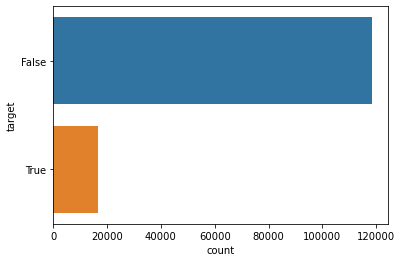

In [947]:
sns.countplot(y='target',data = df_train)

In [948]:
# убирает 28 процентов порно
df_bad['title'].str.contains('porn').value_counts()
mask_title_porn = df_bad['title'].str.contains('porn|Porn')

4796/(11919+4796) = 4796/16715 = 0.28692790906371524

In [949]:
# убирает еще 17 процентов , в тоге из сходных данных убрано 45 процентов ссылок порно
# mask_title_porn = df_bad['title'].str.contains('porn')
df_bad.loc[-mask_title_porn]['url'].str.contains('porn').value_counts()
mask_url_porn = df_bad.loc[-mask_title_porn]['url'].str.contains('porn|Porn')

2813/(11919+4796) = 2813/16715 = 0.16829195333532754

In [950]:
df_bad.loc[-mask_title_porn].loc[-mask_url_porn]

,id,url,title,target
19,19,24eropixel.net,мужик поставил блондинку раком и отодрал ее ту...,True
21,21,gdespaces.com,порно которое ты искал / видео - spaces.ru / s...,True
41,41,hdxclub.com,лесбийский секс с кунилингусом двух стройных с...,True
52,52,desixxxtube.pro,indian aunty bjowjob and fucking with her part...,True
55,55,daftsex.com,playlist lesbian — daftsex,True
...,...,...,...,...
135184,135184,mail.ru,фото группы - 2100 фото. сообщество сумасшедши...,True
135186,135186,konchator.com,брюнетка села киской на лицо парня для кунилин...,True
135208,135208,biqle.com,lucie jones shows her big tits pantyhose — biq...,True
135253,135253,sexlib.org,все рассказы про: «первое знакомство с сексом»...,True


In [951]:
df_bad.loc[-mask_title_porn].loc[-mask_url_porn]['title'].str.contains(' порно ').value_counts()

False    7144
True     1935
Name: title, dtype: int64

In [952]:
df_bad['title'].str.contains(' порно ').value_counts()

False    13384
True      3331
Name: title, dtype: int64

In [953]:
df_train['title'].str.contains(' порно ').value_counts()

False    131977
True       3332
Name: title, dtype: int64

In [954]:
df_good.loc[df_good['title'].str.contains(' порно ')]

,id,url,title,target
114128,114128,www-segodnya-ua.cdn.ampproject.org,жители крыма решили подзаработать на домашнем ...,False


In [955]:
df_bad.url.nunique()

3473

Работа с юрлами

In [956]:
df_bad['len_title'] = df_bad.title.str.len()
df_bad['len_url'] = df_bad.url.str.len()

df_good['len_title'] = df_good.title.str.len()
df_good['len_url'] = df_good.url.str.len()

<ipython-input-956-b45365e030b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bad['len_title'] = df_bad.title.str.len()
<ipython-input-956-b45365e030b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bad['len_url'] = df_bad.url.str.len()
<ipython-input-956-b45365e030b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [958]:
df_train

,id,url,title,target
0,0,m.kp.md,"экс-министр экономики молдовы - главе мидэи, ц...",False
1,1,www.kp.by,эта песня стала известна многим телезрителям б...,False
2,2,fanserials.tv,банши 4 сезон 2 серия бремя красоты смотреть о...,False
3,3,colorbox.spb.ru,не беси меня картинки,False
4,4,tula-sport.ru,в новомосковске сыграют следж-хоккеисты алекси...,False
...,...,...,...,...
135304,135304,mail.ru,пора тюльпанов турецкий сериал на русском язык...,False
135305,135305,www.ntv.ru,остросюжетный сериал «шеф. игра на повышение»....,False
135306,135306,topclassiccarsforsale.com,"1941 plymouth special deluxe hot rod, automati...",False
135307,135307,wowcream.ru,купить it's skin сыворотка питательная power 1...,False


df_good 37206/118594 = 0.3137258208678348 nunique

df_bad 3473/16715 = 0.2077774454083159 nunique

In [959]:
df_bad.url.value_counts()

daftsex.com            741
biqle.ru               657
m.perfectgirls.net     256
ancensored.com         241
www.pornktube.porn     190
                      ... 
besplatnoevideo.com      1
tporno.life              1
onlainporno1.cc          1
fhdjav.xyz               1
mirzastavok.ru           1
Name: url, Length: 3473, dtype: int64

Ищем ссылки которые встречаются и в порно и нет и смотри как часто они там встречаются, сравниваем и выбираем те которые встречаются в порно намного чаще

In [960]:
bad_all_url = df_bad[df_bad.url.isin(df_good.url)].url.value_counts()

In [961]:
good_all_url = df_good[df_good.url.isin(df_bad.url)].url.value_counts()

In [962]:
good_all_url

mail.ru            7772
zaycev.net          597
libking.ru          526
v-s.mobi            509
www.mamba.ru        460
                   ... 
rusvidos.com          1
lacomics.org          1
sweetmodels.org       1
pirojok.net           1
imxab.ru              1
Name: url, Length: 288, dtype: int64

In [963]:
bad_all_url

biqle.ru              657
xuk.life              154
noodlemagazine.com    143
mail.ru               128
ftopx.com             108
                     ... 
san4ik.ru               1
pb.wtf                  1
xitfilms.ru             1
wpapers.ru              1
th.vlip.lv              1
Name: url, Length: 288, dtype: int64

In [964]:
df_bad.url.nunique()

3473

In [965]:
df_good.url.nunique()

37206

In [966]:
df_bad

,id,url,title,target,len_title,len_url
8,8,xlecx.com,league of legends » page 5 » porn comics free ...,True,52,9
12,12,pornmult.info,"кримпай,мать и сын » страница 5 » смотреть пор...",True,98,13
19,19,24eropixel.net,мужик поставил блондинку раком и отодрал ее ту...,True,86,14
21,21,gdespaces.com,порно которое ты искал / видео - spaces.ru / s...,True,52,13
41,41,hdxclub.com,лесбийский секс с кунилингусом двух стройных с...,True,110,11
...,...,...,...,...,...,...
135221,135221,nola-london.com,pinoy - the biggest collection of pinoy qualit...,True,65,15
135239,135239,pornotwix.com,two titted blondes enjoy big cock negra,True,39,13
135253,135253,sexlib.org,все рассказы про: «первое знакомство с сексом»...,True,78,10
135256,135256,pakistanporn.info,food wild indian tube on pakistanporn.info,True,42,17


In [967]:
-df_bad.url.isin(df_good.url)

8         False
12         True
19         True
21        False
41         True
          ...  
135221     True
135239     True
135253     True
135256     True
135287     True
Name: url, Length: 16715, dtype: bool

In [968]:
df_bad.loc[df_bad.url == 'zaycev.net']

,id,url,title,target,len_title,len_url
9692,9692,zaycev.net,скачать бесплатно порнофильмы - приезжай! в mp...,True,83,10
26765,26765,zaycev.net,порнофильмы — я так соскучился,True,30,10


In [969]:
df_bad[-df_bad.url.isin(df_good.url)]

,id,url,title,target,len_title,len_url
12,12,pornmult.info,"кримпай,мать и сын » страница 5 » смотреть пор...",True,98,13
19,19,24eropixel.net,мужик поставил блондинку раком и отодрал ее ту...,True,86,14
41,41,hdxclub.com,лесбийский секс с кунилингусом двух стройных с...,True,110,11
47,47,jrfzdohkntmopulam5635ayigseqr47ghplfa5l67uo72g...,lesbians monique alexander and violet starr fu...,True,74,71
52,52,desixxxtube.pro,indian aunty bjowjob and fucking with her part...,True,68,15
...,...,...,...,...,...,...
135221,135221,nola-london.com,pinoy - the biggest collection of pinoy qualit...,True,65,15
135239,135239,pornotwix.com,two titted blondes enjoy big cock negra,True,39,13
135253,135253,sexlib.org,все рассказы про: «первое знакомство с сексом»...,True,78,10
135256,135256,pakistanporn.info,food wild indian tube on pakistanporn.info,True,42,17


Ссылки которые встречаются только в порно
df_bad[-df_bad.url.isin(df_good.url)].url

In [970]:
porn_url = df_bad[-df_bad.url.isin(df_good.url)].url

In [971]:
no_porn_url = df_good[-df_good.url.isin(df_bad.url)].url

In [972]:
# Данные из теста в которых встречаются только плохий ссылки
df_test.url.isin(porn_url).value_counts()

False    149940
True      15438
Name: url, dtype: int64

In [973]:
sum(df_test.url.isin(porn_url))

15438

Работаем с таргетом

In [974]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [975]:
y_train_all = df_train['target'].astype(int)
X_test_all = df_test['title']

НЛТК

In [976]:
# import nltk

In [977]:
# nltk.download('wordnet')

In [978]:
# nltk.download('punkt')

In [979]:
# from nltk.stem import WordNetLemmatizer 

In [980]:
# lemmatizer = WordNetLemmatizer()

In [981]:
# from nltk import word_tokenize          
# from nltk.stem import WordNetLemmatizer 
# class LemmaTokenizer(object):
#        def __init__(self):
#            self.wnl = WordNetLemmatizer()
#        def __call__(self, articles):
#            return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

# tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer()) # works
# X_train_vectorized_url = tf_vectorizer.fit_transform(df_train['url'])

Векторизуем пространство

In [982]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [983]:
vectorizer_title = CountVectorizer(
    
#     stop_words=stop_words,
#     ngram_range =(1,2),
)

In [984]:
X_train_vectorized_title = vectorizer_title.fit_transform(df_train['title'])

In [985]:
feature_names = np.array(vectorizer_title.get_feature_names())

In [986]:
len(feature_names)

189852

In [987]:
from pprint import pprint

In [988]:
vectorizer_url = CountVectorizer(
    
#     ngram_range =(1,2),
)

In [989]:
X_train_vectorized_url = vectorizer_url.fit_transform(df_train['url'])

In [990]:
feature_names = np.array(vectorizer_url.get_feature_names())

In [991]:
len(feature_names)

35002

In [992]:
pprint(feature_names, compact = True)

array(['000', '000webhostapp', '003ms', ..., 'читать', 'швейная',
       'экогород'], dtype='<U52')


Векторизуем слова по 2

In [1005]:
import nltk
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('russian')
vectorizer_2_title = CountVectorizer(
    stop_words=stop_words,
    min_df = 0.00001,
    max_df=0.9,
    ngram_range =(2,2),
)

In [1006]:
X_train_vectorized_2_title = vectorizer_2_title.fit_transform(df_train['title'])

In [1007]:
feature_names = np.array(vectorizer_2_title.get_feature_names())

In [1008]:
len(feature_names)

74231

In [1009]:
vectorizer_2_url = CountVectorizer(
    stop_words=stop_words,
    min_df = 0.00001,
    max_df=0.9,
    ngram_range =(2,2),
)

In [1010]:
X_train_vectorized_2_url = vectorizer_2_url.fit_transform(df_train['url'])

In [1011]:
feature_names = np.array(vectorizer_2_url.get_feature_names())

In [1012]:
len(feature_names)

16985

Векторизуем по буквам

In [1002]:
vectorizer_char_title = TfidfVectorizer(
    analyzer = 'char',
    ngram_range =(1,5),
    stop_words=stop_words,
    min_df = 0.0001,
    max_df=0.9
#     min_df = 0.0001
)

In [1003]:
X_train_vectorized_char_title = vectorizer_char_title.fit_transform(df_train['title'])

In [1004]:
len(vectorizer_char_title.get_feature_names())

176266

In [496]:
# pprint(feature_names, compact = True)

In [818]:
vectorizer_char_url = TfidfVectorizer(
    analyzer = 'char',
    stop_words=stop_words,
    min_df = 0.00001,
    max_df=0.9,

    ngram_range =(1,5),

#     min_df = 0.0001
)

In [819]:
X_train_vectorized_char_url = vectorizer_char_url.fit_transform(df_train['url'])

In [820]:
len(vectorizer_char_url.get_feature_names())

148139

In [40]:
# pprint(vectorizer_char_url.get_feature_names(), compact = True)

Используем ТФ-ИДФ

In [842]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [843]:
tf_vectorizer = TfidfVectorizer(
#     ngram_range=(1,2)
)

In [844]:
X_train_tf_vectorized = tf_vectorizer.fit_transform(df_train['title'])

In [845]:
feature_names = np.array(tf_vectorizer.get_feature_names())

In [846]:
len(feature_names)

189852

In [761]:
tf_vectorizer.get_params()

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 1), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': None, 'strip_accents': None, 'sublinear_tf': False, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': True, 'vocabulary': None}

Параметры для векторизации

In [1013]:

from sklearn.linear_model import LogisticRegression, SGDClassifier


In [328]:
stop_words = nltk.corpus.stopwords.words('russian')

In [349]:
# count_model = Pipeline([
#     (
#         'vectorizer',
#         CountVectorizer(
#             lowercase=True, ngram_range=(1, 1),
#             stop_words=stop_words, min_df=3, max_df=0.8
#         )
#     ),
#     ('clf', LogisticRegression(penalty='l2',random_state = 42, max_iter=1000))
# ])

In [350]:
# x_train = df_train['title'].values

In [1014]:
# count_model.fit(x_train, y_train_all)

In [352]:
f1_score(y_train_all, count_model.predict(x_train))

0.968977709454266

In [354]:
cross_val_score(count_model, x_train, y_train_all, cv=5, scoring='f1').mean()

0.9436176821127672

Делим на тест и сплит

In [700]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tf_vectorized, y_train_all,
                                                    test_size=0.33, random_state=42)

xgb

In [164]:
import xgboost as xgb

In [167]:
xgb_class = xgb.XGBClassifier()

In [168]:
xgb_class.fit(
    X_train_vectorized_2_url,
    y_train_all
)

y_pred = xgb_class.predict(
    X_train_vectorized_2_url
)

In [169]:
f1_score(y_train_all, y_pred)

0.653856953748646

In [1182]:
cross_val_score(xgb_class, X_train_vectorized, y_train_all, cv=5, scoring='f1')

array([0.87129675, 0.87168714, 0.87067161, 0.8719188 , 0.87836108])

0.73 - title char

0.87 - url

Логистическая регрессия

In [773]:
from sklearn.linear_model import LogisticRegression

In [821]:
logreg = LogisticRegression(solver='liblinear', penalty='l1',random_state = 42, max_iter=100)

In [825]:
logreg.fit(X_train_vectorized_char_url,y_train_all)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [826]:
y_pred = logreg.predict(X_train_vectorized_char_url)
f1_score(y_train_all, y_pred)

0.9116963347450882

In [827]:
cross_val_score(logreg, X_train_vectorized_char_url, y_train_all, cv=5, scoring='f1').mean()

0.8977193089994158

0.943 - title 

0.7780616011450745 - title  2ngram

0.8148639142362228 - url 2ngram

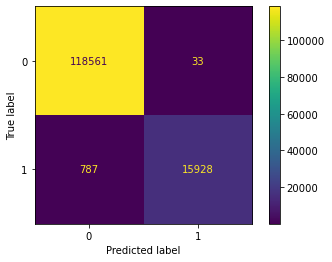

In [427]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train_all, y_pred)).plot()

.

RF

In [152]:
# from sklearn.ensemble import RandomForestClassifier

In [235]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(random_state=42, n_estimators = 50)

In [237]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(random_state=42, n_estimators = 50)
# clf.fit(X_train_vectorized_title,y_train_all)
# y_pred = clf.predict(X_train_vectorized_title)
# f1_score(y_train_all, y_pred)

In [155]:
# cross_val_score(clf, X_train_vectorized_title, y_train_all, cv=5, scoring='f1').mean()

Cat

In [1]:
# !pip install catboost

In [3]:
# !pip install ipywidgets

In [7]:
# !jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [156]:
# from catboost import CatBoostClassifier
# import timeit

# ctb = CatBoostClassifier(
#     eval_metric= 'F1',
#     iterations=100,
#     learning_rate=0.03
# )
  
# ctb.fit(
#       df_train['title'], df_train['target'],
#       plot = 'True',
#       verbose=10
# )

In [157]:
# cross_val_score(ctb, X_train_vectorized_title, y_train_all, cv=5, scoring='f1').mean()

Пробую стакать овтеты разных фичей(RSM)

In [742]:
n_estimators = 11
answer = []
for i in range(n_estimators - 1):
    logreg_bag = LogisticRegression(solver='liblinear', penalty='l1',random_state = i, max_iter=100)
    features = np.random.choice(np.arange(X_train_vectorized_title.shape[1]), X_train_vectorized_title.shape[1] // 2, replace=False)    
    logreg_bag.fit(X_train_vectorized_title[:, features],y_train_all)
    answer.append(logreg_bag.predict_proba(X_train_vectorized_title[:, features]))
    answer[0] = answer[0] + answer[i]
answer = answer[0]/(n_estimators)

In [743]:
answer

array([[0.99054769, 0.00945231],
       [0.97440968, 0.02559032],
       [0.98164155, 0.01835845],
       ...,
       [0.91037054, 0.08962946],
       [0.9799839 , 0.0200161 ],
       [0.97794895, 0.02205105]])

В итоге это не дело преимущества, на лидерборде ответс RSM был хуже чем без него

Пробуем провекторизовать по буквам

In [500]:
import xgboost as xgb

In [501]:
xgb_class_char_url = xgb.XGBClassifier(n_esimators = 95)

In [828]:
xgb_class_char_url.fit(
    X_train_vectorized_char_url,
    y_train_all
)

y_pred = xgb_class_char_url.predict(
    X_train_vectorized_char_url
)
f1_score(y_train_all, y_pred)

0.9254110328191455

In [829]:
cross_val_score(xgb_class_char_url, X_train_vectorized_char_url, y_train_all, cv=5, scoring='f1').mean()

0.9119543321801411

тайтл

In [830]:
xgb_class_char_title = xgb.XGBClassifier(n_estimators = 95)

In [831]:
xgb_class_char_title.fit(
    X_train_vectorized_char_title,
    y_train_all
)

y_pred = xgb_class_char_title.predict(
    X_train_vectorized_char_title
)
f1_score(y_train_all, y_pred)

0.9745552527634036

In [832]:
cross_val_score(xgb_class_char_title, X_train_vectorized_char_title, y_train_all, cv=5, scoring='f1')

Стакинг

In [846]:
logreg_url = LogisticRegression(solver='liblinear', penalty='l1',random_state = 42, max_iter=100)

In [847]:
logreg_url.fit(X_train_vectorized_url,y_train_all)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [848]:
cross_val_score(logreg_url, X_train_vectorized_url, y_train_all, cv=5, scoring='f1').mean()

0.8786275380441563

vect - 0.865

In [849]:
logreg_title = LogisticRegression(solver='liblinear', penalty='l1',random_state = 42, max_iter=100)
logreg_title.fit(X_train_vectorized_title, y_train_all)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [850]:
cross_val_score(logreg_title, X_train_vectorized_title, y_train_all, cv=5, scoring='f1').mean()

0.9458607662141677

In [650]:
# logreg_stack = LogisticRegression(penalty='l2',random_state = 42, max_iter=1000)
# logreg_stack.fit(np.hstack((logreg_title.predict_proba(X_train_vectorized_title), logreg_url.predict_proba(X_train_vectorized_url))), y_train_all)

In [935]:
from scipy.sparse import csr_matrix, find

In [651]:
# cross_val_score(logreg_stack, np.hstack((logreg_title.predict_proba(X_train_vectorized), logreg_url.predict_proba(X_train_vectorized_url))), y_train_all, cv=5, scoring='f1')

In [851]:
predict_word = np.hstack((logreg_title.predict_proba(X_train_vectorized_title), logreg_url.predict_proba(X_train_vectorized_url)))

Стакинг вероятностей слов в юрл и тайтл

In [852]:
xgb_stack_word = xgb.XGBClassifier(n_estimators = 92)
xgb_stack_word.fit(predict_word,y_train_all)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=92, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [853]:
cross_val_score(xgb_stack_word, predict_word, y_train_all, cv=5, scoring='f1').mean()

0.9865755125357077

Стакинг чара в юрл и тайтле

In [844]:
predict_char = np.hstack((xgb_class_char_title.predict_proba(X_train_vectorized_char_title),
                          xgb_class_char_url.predict_proba(X_train_vectorized_char_url)))

In [845]:
xgb_stack_char = xgb.XGBClassifier(n_estimators = 92)
xgb_stack_char.fit(predict_char,y_train_all)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=92, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
cross_val_score(xgb_stack_char, predict_char, y_train_all, cv=5, scoring='f1')

array([0.99206468, 0.99250824, 0.99159664, 0.99086963, 0.99281222])

Добавляем еще стакинг по 2 словам

In [1015]:
logreg_2_title= LogisticRegression(solver='liblinear', penalty='l1',random_state = 42, max_iter=100)
logreg_2_title.fit(X_train_vectorized_2_title, y_train_all)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [1016]:
cross_val_score(logreg_2_title, X_train_vectorized_2_title, y_train_all, cv=5, scoring='f1').mean()

0.8283509421393237

In [1017]:
logreg_2_url= LogisticRegression(solver='liblinear', penalty='l1',random_state = 42, max_iter=100)
logreg_2_url.fit(X_train_vectorized_2_url,y_train_all)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [1018]:
cross_val_score(logreg_2_url, X_train_vectorized_2_url, y_train_all, cv=5, scoring='f1').mean()

0.8592920536657755

In [1019]:
predict_2_word = np.hstack((logreg_2_title.predict_proba(X_train_vectorized_2_title),
                          logreg_2_url.predict_proba(X_train_vectorized_2_url)))

In [1020]:
xgb_stack_2_word = xgb.XGBClassifier(n_estimators = 92)
xgb_stack_2_word.fit(predict_2_word,y_train_all)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=92, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1021]:
cross_val_score(xgb_stack_2_word, predict_2_word, y_train_all, cv=5, scoring='f1').mean()

0.9693485067104346

КОГДА СТАКАЕМ ЕЩЕ 2 СЛОВА
Это мы берем тайтл и юрл по 2 и по 1 слову и стакаем их вероятности

In [1022]:
predict_1_2_word = np.hstack((xgb_stack_word.predict_proba(predict_word),
                             xgb_stack_2_word.predict_proba(predict_2_word)))

In [1023]:
xgb_stack_word_1_2 = xgb.XGBClassifier()
xgb_stack_word_1_2.fit(predict_1_2_word,y_train_all)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1024]:
cross_val_score(xgb_stack_word_1_2, predict_1_2_word, y_train_all, cv=5, scoring='f1').mean()

0.9915272429885379

Далее стакаем вероятности предсказаний по чару и по словам

In [1025]:
xgb_stack_all = xgb.XGBClassifier()
xgb_stack_all.fit(np.hstack((xgb_stack_word_1_2.predict_proba(predict_1_2_word),
                             xgb_stack_char.predict_proba(predict_char))),
                             y_train_all)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1026]:
cross_val_score(xgb_stack_all, np.hstack((xgb_stack_word_1_2.predict_proba(predict_1_2_word),
                             xgb_stack_char.predict_proba(predict_char))), y_train_all, cv=5, scoring='f1').mean()

0.9979947238363011

Когда стакаем только слово и чар, тут мы не берем предсказания по 2 словам( только по 1)

In [854]:
# xgb_stack_all = xgb.XGBClassifier()
# xgb_stack_all.fit(np.hstack((xgb_stack_word.predict_proba(predict_word),
#                              xgb_stack_char.predict_proba(predict_char))),
#                              y_train_all)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [855]:
# cross_val_score(xgb_stack_all, np.hstack((xgb_stack_word.predict_proba(predict_word),
#                                           xgb_stack_char.predict_proba(predict_char))), y_train_all, cv=5, scoring='f1').mean()

0.9969765627979728

Тут находим параметры для моделей, как пример логистическая регрессия)

In [214]:
from sklearn.model_selection import GridSearchCV

In [462]:
parameters = {'max_iter': range(100,1000,50)}

In [463]:
log = LogisticRegression(solver='liblinear', penalty='l1',random_state = 42)

In [464]:
clf = GridSearchCV(log, parameters, cv=5, scoring='f1')

In [465]:
clf.fit(X_train_vectorized_title,y_train_all)

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', random_state=42,
                                          solver='liblinear'),
             param_grid={'max_iter': range(100, 1000, 50)}, scoring='f1')

In [466]:
clf.best_params_

{'max_iter': 100}

95 - stack char

Ответ

In [1027]:
X_test_vectorized_title = vectorizer_title.transform(df_test['title'])
X_test_vectorized_url = vectorizer_url.transform(df_test['url'])
X_test_vectorized_2_title = vectorizer_2_title.transform(df_test['title'])
X_test_vectorized_2_url = vectorizer_2_url.transform(df_test['url'])


X_test_vectorized_char_title = vectorizer_char_title.transform(df_test['title'])
X_test_vectorized_char_url = vectorizer_char_url.transform(df_test['url'])

In [1293]:
# df_test["target"] = logreg.predict(X_test_vectorized)

Стакинг ответ

Для RSM

In [753]:
# n_estimators = 11
# answer_title = []
# for i in range(n_estimators - 1):
#     logreg_bag = LogisticRegression(solver='liblinear', penalty='l1',random_state = i, max_iter=100)
#     features = np.random.choice(np.arange(X_train_vectorized_title.shape[1]), X_train_vectorized_title.shape[1] // 2, replace=False)    
#     logreg_bag.fit(X_train_vectorized_title[:, features],y_train_all)
#     answer_title.append(logreg_bag.predict_proba(X_test_vectorized_title[:, features]))
#     answer_title[0] = answer_title[0] + answer_title[i]
# answer_title = answer_title[0]/(n_estimators)

In [749]:
# n_estimators = 11
# answer_url = []
# for i in range(n_estimators - 1):
#     logreg_bag = LogisticRegression(solver='liblinear', penalty='l1',random_state = i, max_iter=100)
#     features = np.random.choice(np.arange(X_train_vectorized_url.shape[1]), X_train_vectorized_url.shape[1] // 2, replace=False)    
#     logreg_bag.fit(X_train_vectorized_url[:, features],y_train_all)
#     answer_url.append(logreg_bag.predict_proba(X_test_vectorized_url[:, features]))
#     answer_url[0] = answer_url[0] + answer_url[i]
# answer_url = answer_url[0]/(n_estimators)

Без RSM

In [1028]:
# ans_word = xgb_stack_word.predict_proba(np.hstack((answer_title,answer_url)))

ans_word = xgb_stack_word.predict_proba(np.hstack((logreg_title.predict_proba(X_test_vectorized_title),
                            logreg_url.predict_proba(X_test_vectorized_url))))
ans_2_word = xgb_stack_2_word.predict_proba(np.hstack((logreg_2_title.predict_proba(X_test_vectorized_2_title),
                          logreg_2_url.predict_proba(X_test_vectorized_2_url))))


ans_1_2_word = xgb_stack_word_1_2.predict_proba(np.hstack((ans_word,ans_2_word)))


ans_char = xgb_stack_char.predict_proba(np.hstack((xgb_class_char_title.predict_proba(X_test_vectorized_char_title),
                            xgb_class_char_url.predict_proba(X_test_vectorized_char_url))))

In [1029]:
df_test["target"] = xgb_stack_all.predict(np.hstack((ans_1_2_word,ans_char)))

In [1030]:
df_test["target"] = df_test["target"].astype(bool)

In [1031]:
df_test[["id", "target"]].to_csv("Prediction_XGB_stack_char_(1,5)_2_word(90).csv", index=False)

Данно предсказание набрало 0.98384 на лидерборде, это не лучшее предсказание(лучшее - 0.98481).

Здесь я использовал стакинг по 2 словам это чутка убавило скор.

В итоге:

    В данном соревновании я попробовал получить предсказание с помощью стакинга и RSM, это дало ощутимый результат по сравнению с обычными методами. Логистическая регрессия на одних словах или чарах давала 0.95 на лидерборде.
    
    Изначально, я брал только слова в тайтлах и юрлах результат был около 0.95. Далее к словам я застакал чары что дало существенный прирост, скор стал 0.97. В конце я добавил к чару несколько символов(ngram_range(1,5)), что дало наилучший мой результат на лидерборде - 0.984.
    
    Так же я попробовал метод методе случайных подпространств(RSM), это не дело существенного прироста, поэтому я его не использовал в итоговом результате. Скор был окло 0.982

Тут сравниванию как плохие ссылки( bad_url) которые в трейне встречались только в порно, предсказаны классификатором

In [892]:
df_test

,id,url,title,target
0,135309,www.kommersant.ru,шестой кассационный суд в самаре начнет работу...,False
1,135310,urexpert.online,"что такое индексация алиментов, кем и в каких ...",False
2,135311,imperimeha.ru,женщинам | империя меха - part 12,False
3,135312,national-porn.com,"небритые, волосатые киски: порно всех стран и ...",True
4,135313,2gis.ru,67,False
...,...,...,...,...
165373,300682,etp.armtek.ru,armtek - запчасти для грузовых и легковых авто...,False
165374,300683,mail.ru,"лилия якупова - караганда, карагандинская обла...",False
165375,300684,xn----8sbnqchpeeeth.xn--p1ai,администрация лесного района тверской области ...,False
165376,300685,www-sunhome-ru.cdn.ampproject.org,сонник изменение сознания. к чему снится измен...,False


In [893]:
df_test.title = df_test.tччitle.str.lower()

In [894]:
test_porn = df_test['title'].str.contains(' порно | porn')

In [895]:
df_test.loc[df_test.url.isin(porn_url)].loc[df_test.target == False]

,id,url,title,target
487,135796,aliciante.eu,naruto hentai nhentai. naruto hentai on alicia...,False
2001,137310,wherewhore.com,delaware | wherewhore,False
2240,137549,topspiski.com,серия бригадный генерал (макс глебов) все книг...,False
7363,142672,lovetorrent.net,staxus.com скачать торрент на lovetorrent.net,False
10960,146269,uzwaps.ru,скачать частные интим фото вк жены моей-6079 б...,False
...,...,...,...,...
158060,293369,nonameno.com,smartshop33 — совместные покупки во владимире,False
159308,294617,ru.erkiss2.com,просмотр фото,False
159482,294791,x.epidemz.net.co,new x epidemz net co 18 (новый адрес 2019) » ...,False
160703,296012,transex.ru,трансы москвы — моя страница,False


In [896]:
df_test.url.isin(no_porn_url)

0          True
1          True
2         False
3         False
4          True
          ...  
165373     True
165374    False
165375     True
165376     True
165377     True
Name: url, Length: 165378, dtype: bool